# PL Predictor

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing Dataset

In [2]:
dataset = pd.read_csv('Final.csv')

In [3]:
column_names = dataset.columns.to_list()
print(column_names)

['HomeTeam', 'AwayTeam', 'HTHG', 'HTAG', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HR', 'AR', 'FTHG', 'FTAG']


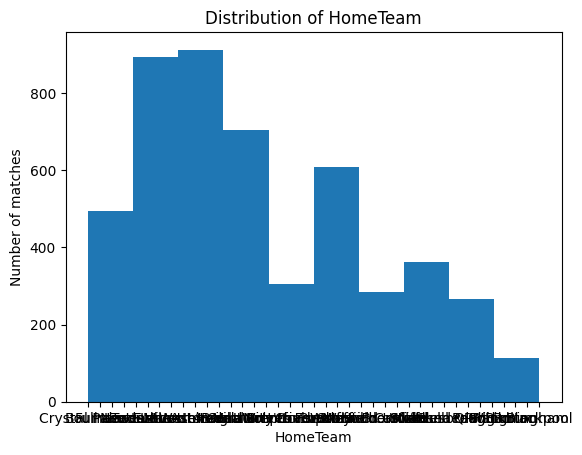

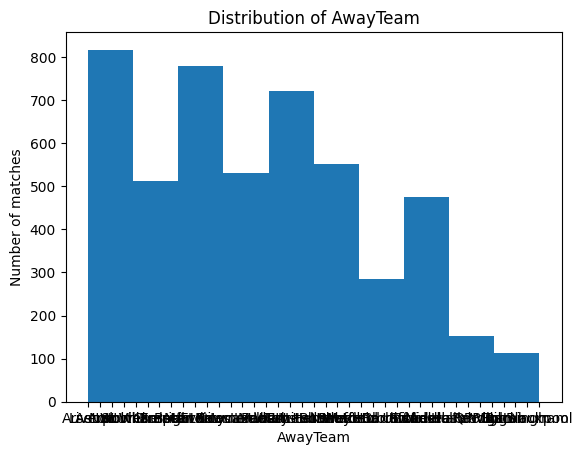

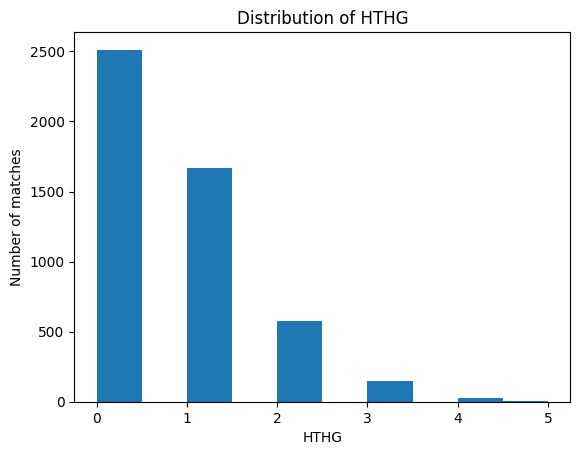

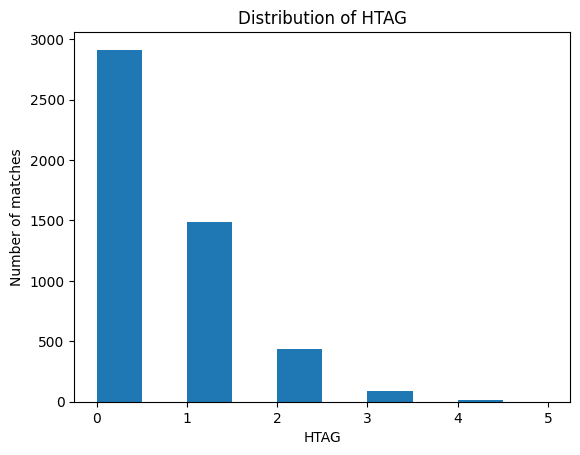

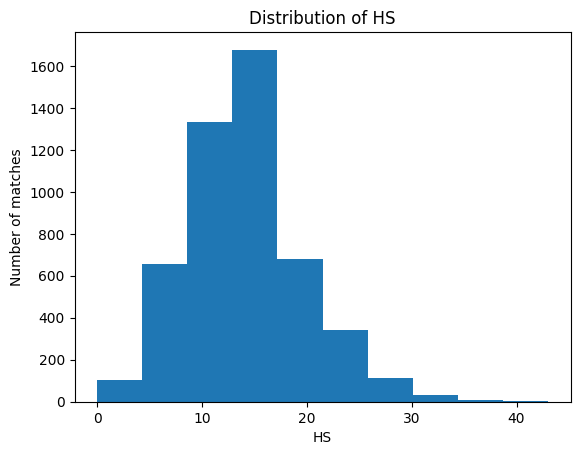

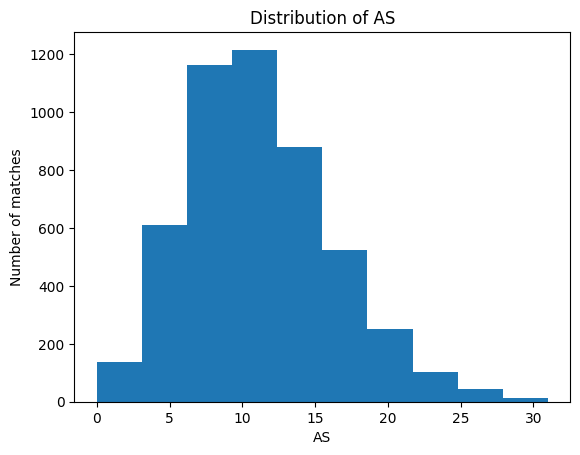

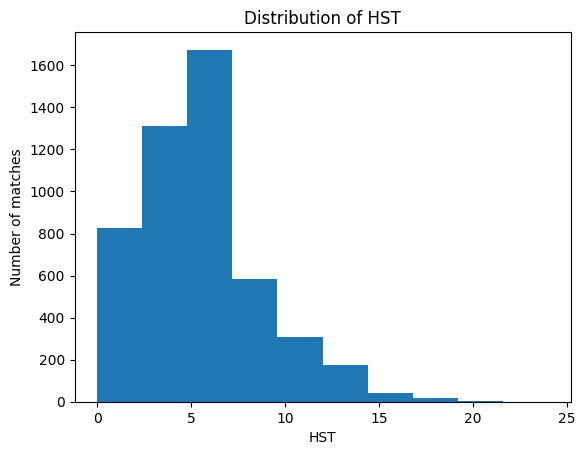

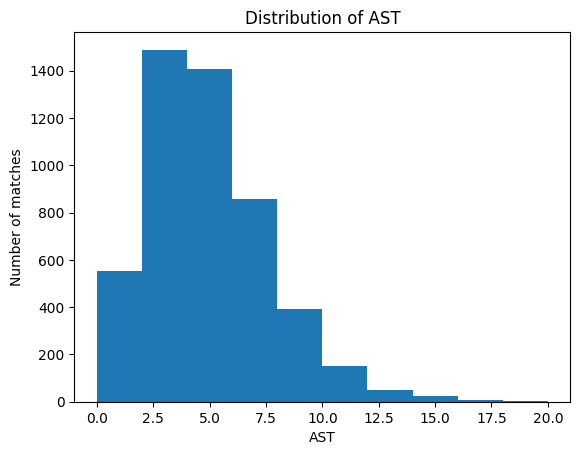

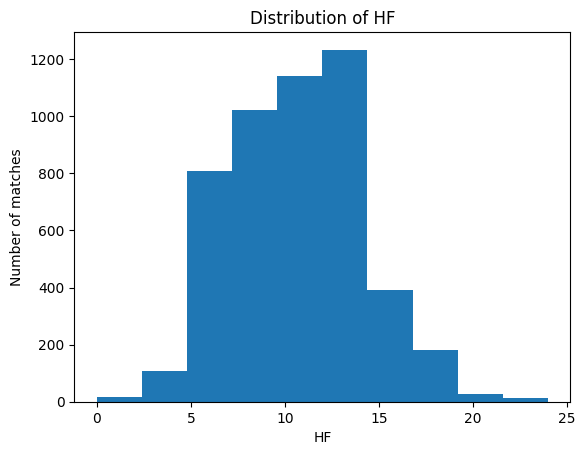

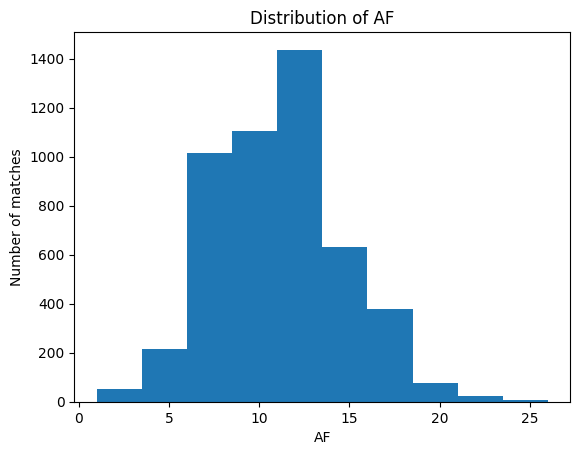

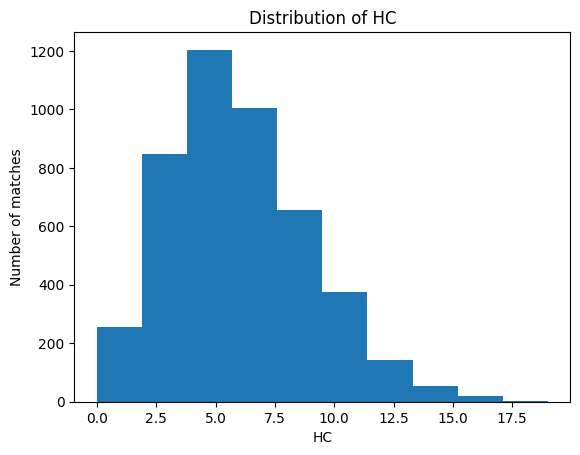

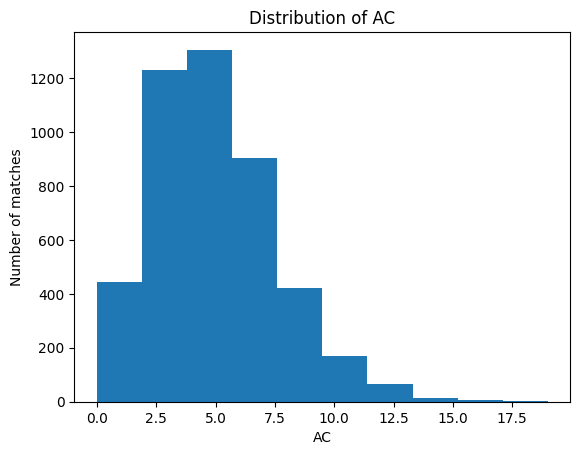

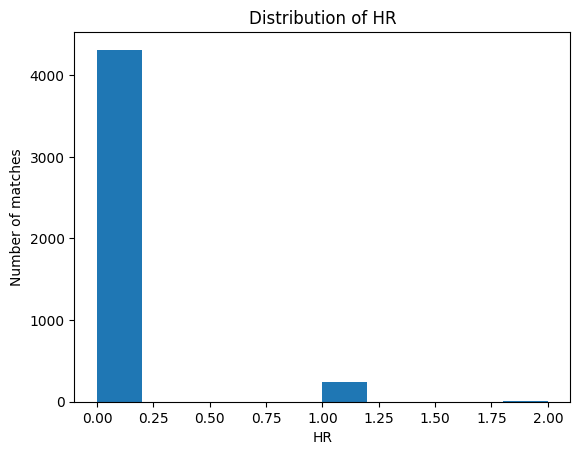

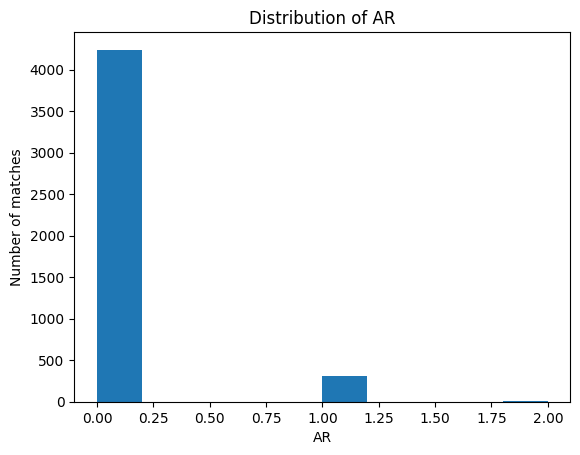

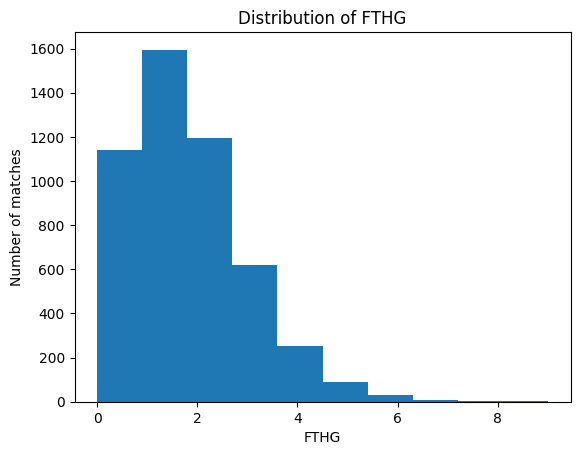

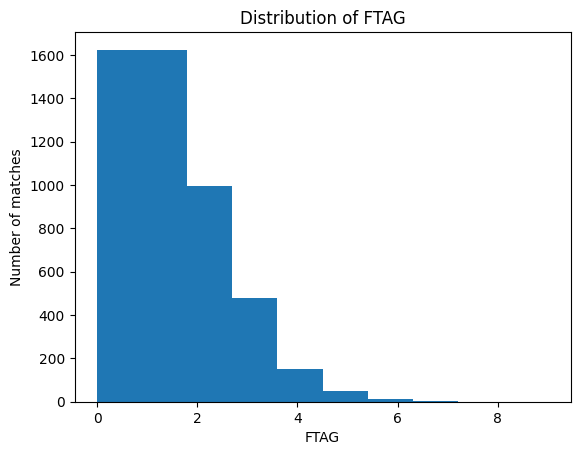

In [4]:
for feature in column_names:
    plt.hist(dataset[feature])
    plt.xlabel(feature)
    plt.ylabel('Number of matches')
    plt.title(f'Distribution of {feature}')
    plt.show()

## PreProcessing

### Checking unique values

In [5]:
for feature in ['HomeTeam', 'AwayTeam']:
    print(feature, "  ", len(dataset[feature].unique()))

HomeTeam    39
AwayTeam    39


In [6]:
print(dataset)

            HomeTeam       AwayTeam  HTHG  HTAG  HS  AS  HST  AST  HF  AF  \
0     Crystal Palace        Arsenal     0     1  10  10    2    2  16  11   
1             Fulham      Liverpool     1     0   9  11    3    4   7   9   
2        Bournemouth    Aston Villa     1     0   7  15    3    2  18  16   
3              Leeds         Wolves     1     1  12  15    4    6  13   9   
4          Newcastle  Nott'm Forest     0     0  23   5   10    0   9  14   
...              ...            ...   ...   ...  ..  ..  ...  ...  ..  ..   
4935       Newcastle      West Brom     2     0  15  13   10    7   5   8   
4936           Stoke          Wigan     0     0  11  11    5    9  10   9   
4937       Tottenham     Birmingham     0     0  22   7   16    3   5  15   
4938        West Ham     Sunderland     0     1  17  17   12   12   7   8   
4939          Wolves      Blackburn     0     3  12  13    5   10  12   9   

        HC   AC   HR   AR  FTHG  FTAG  
0      3.0  5.0  0.0  0.0     0    

### Spliting into Dep. and Indep. Variables

In [7]:
X = dataset.iloc[:, :-2].values
y = dataset.iloc[:, -2:].values

In [8]:
print(X)
print(X.shape)

[['Crystal Palace' 'Arsenal' 0 ... 5.0 0.0 0.0]
 ['Fulham' 'Liverpool' 1 ... 4.0 0.0 0.0]
 ['Bournemouth' 'Aston Villa' 1 ... 5.0 0.0 0.0]
 ...
 ['Tottenham' 'Birmingham' 0 ... 5.0 0.0 0.0]
 ['West Ham' 'Sunderland' 0 ... 6.0 0.0 0.0]
 ['Wolves' 'Blackburn' 0 ... 3.0 0.0 0.0]]
(4940, 14)


In [9]:
print(y)
print(y.shape)

[[0 2]
 [2 2]
 [2 0]
 ...
 [2 1]
 [0 3]
 [2 3]]
(4940, 2)


### Missing Data

In [10]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, 10:])
X[:, 10:] = imputer.transform(X[:, 10:])

### One Hot Encoding of Team Names

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 0] = le.fit_transform(X[:, 0])
X[:, 1] = le.transform(X[:, 1])

In [12]:
print(X)

[[12 0 0 ... 5.0 0.0 0.0]
 [14 19 1 ... 4.0 0.0 0.0]
 [6 1 1 ... 5.0 0.0 0.0]
 ...
 [33 2 0 ... 5.0 0.0 0.0]
 [36 31 0 ... 6.0 0.0 0.0]
 [38 3 0 ... 3.0 0.0 0.0]]


In [13]:
print(X.shape)

(4940, 14)


### Splitting into test and train

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 0)

In [15]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4199, 14)
(4199, 2)
(741, 14)
(741, 2)


### Scaling 

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [17]:
print(X_train)

[[ 1.43643523  0.26913919  1.54668678 ...  0.49193834 -0.24332082
  -0.28159335]
 [-0.08658083 -1.07826817  1.54668678 ... -0.65132466 -0.24332082
  -0.28159335]
 [-0.08658083 -0.1799966   0.36779083 ... -1.41349999 -0.24332082
  -0.28159335]
 ...
 [-0.17617001  1.25723792  1.54668678 ...  1.25411367 -0.24332082
   3.56886688]
 [-0.98247263  0.08948488 -0.81110512 ... -0.65132466 -0.24332082
  -0.28159335]
 [-0.80329427  0.80810214  0.36779083 ...  0.49193834 -0.24332082
  -0.28159335]]


In [18]:
print(X_test)

[[ 1.61561359 -0.98844101 -0.81110512 ...  0.11085067 -0.24332082
  -0.28159335]
 [ 1.34684605 -0.53930523  1.54668678 ...  0.11085067 -0.24332082
  -0.28159335]
 [-0.62411591  0.80810214  0.36779083 ...  2.016289   -0.24332082
  -0.28159335]
 ...
 [-0.80329427 -1.79688543 -0.81110512 ... -1.41349999 -0.24332082
  -0.28159335]
 [-1.07206181 -0.8087867  -0.81110512 ... -0.65132466 -0.24332082
  -0.28159335]
 [ 1.43643523  1.16741077  1.54668678 ...  0.49193834 -0.24332082
   3.56886688]]


## Building ANN

In [19]:
import tensorflow as tf

### Initialising

In [20]:
ann = tf.keras.models.Sequential()

### Input Layer

In [21]:
ann.add(tf.keras.layers.Dense(units=14, activation='relu'))

### Hidden Layers

In [22]:
ann.add(tf.keras.layers.Dense(units=128, activation='relu'))
ann.add(tf.keras.layers.Dropout(0.1))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dropout(0.1))

### Output

In [23]:
ann.add(tf.keras.layers.Dense(units=2, activation='linear'))

## Training ANN

### Compiling ANN

In [24]:
ann.compile(optimizer = 'adam', loss = 'mse')

### Training on Train Set

In [25]:
ann.fit(X_train, y_train, batch_size = 16, epochs = 200)

Epoch 1/200
263/263 [==============================] - 1s 950us/step - loss: 1.0999
Epoch 2/200
263/263 [==============================] - 0s 842us/step - loss: 0.8110
Epoch 3/200
263/263 [==============================] - 0s 899us/step - loss: 0.7608
Epoch 4/200
263/263 [==============================] - 0s 891us/step - loss: 0.7457
Epoch 5/200
263/263 [==============================] - 0s 905us/step - loss: 0.7277
Epoch 6/200
263/263 [==============================] - 0s 840us/step - loss: 0.7087
Epoch 7/200
263/263 [==============================] - 0s 962us/step - loss: 0.7067
Epoch 8/200
263/263 [==============================] - 0s 972us/step - loss: 0.6878
Epoch 9/200
263/263 [==============================] - 0s 941us/step - loss: 0.6943
Epoch 10/200
263/263 [==============================] - 0s 896us/step - loss: 0.6895
Epoch 11/200
263/263 [==============================] - 0s 847us/step - loss: 0.6776
Epoch 12/200
263/263 [==============================] - 0s 856us/step - lo

In [26]:
y_pred = ann.predict(X_test)
print(y_pred)

24/24 [==============================] - 0s 612us/step
[[ 0.37575302  3.7789605 ]
 [ 3.4882452   1.7907572 ]
 [ 1.1286631  -0.01250702]
 ...
 [ 0.67445946  1.2310175 ]
 [ 0.36699837  3.7952836 ]
 [ 2.925489    0.37533885]]


In [40]:
y_result = np.floor((y_pred*(2/3)) + sc.inverse_transform(X_test)[:, 2:4])
y_result[y_result<0] = 0
print(y_result)

[[0. 5.]
 [4. 2.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 4.]
 [3. 0.]]


In [28]:
print(y_test)

[[0 4]
 [2 1]
 [1 0]
 ...
 [0 1]
 [0 4]
 [2 0]]


# For new Result:

In [86]:
HomeTeam = str(input("Home Team: "))
AwayTeam = str(input("Away Team: "))
HTGoals_Home = int(input("Home Team Goals at HT: "))
HTGoals_Away = int(input("Away Team Goals at HT: "))
Shots_Home = int(input("Home Team total shots: "))
Shots_Away = int(input("Away Team total shots: "))
Shots_T_Home = int(input("Home Team total shots on target: "))
Shots_T_Away = int(input("Away Team total shots on target: "))
Fouls_Home = int(input("Fouls committed by Home team: "))
Fouls_Away = int(input("Fouls committed by Away team: "))
Corners_Home = int(input("Home Team corners: "))
Corners_Away = int(input("Away Team corners: "))
Red_Home = int(input("Home team red cards: "))
Red_Away = int(input("Away team red cards: "))
UserInput = np.array([[HomeTeam, AwayTeam, 
                       HTGoals_Home, HTGoals_Away, 
                       Shots_Home, Shots_Away,
                       Shots_T_Home, Shots_T_Away,
                       Fouls_Home, Fouls_Away,
                       Corners_Home, Corners_Away,
                       Red_Home, Red_Away]])

In [87]:
print(UserInput)

[['Arsenal' 'Man United' '1' '1' '9' '3' '5' '2' '8' '7' '12' '3' '0' '0']]


In [88]:
UserInput[:, 1] = le.transform(UserInput[:, 1])
UserInput[:, 0] = le.transform(UserInput[:, 0])
print(UserInput)
UserInput = sc.transform(UserInput)
print(UserInput)

[['0' '21' '1' '1' '9' '3' '5' '2' '8' '7' '12' '3' '0' '0']]
[[-1.78877525  0.08948488  0.36779083  0.60866355 -0.89617309 -1.72416051
  -0.14193831 -0.89646761 -0.75041189 -1.09205284  2.08845352 -0.65132466
  -0.24332082 -0.28159335]]


In [89]:
Outpupt = ann.predict(UserInput)
Outpupt = np.floor(Outpupt*(2/3)) + sc.inverse_transform(UserInput)[:, 2:4]
print(Outpupt)

1/1 [==============================] - 0s 14ms/step
[[2. 1.]]


In [93]:
if (Outpupt[0][0]>Outpupt[0][1]):
    print(f"Winner: {HomeTeam} ({int(Outpupt[0][0])} - {int(Outpupt[0][1])})")
elif (Outpupt[0][0]<Outpupt[0][1]):
    print(f"Winner: {AwayTeam} ({int(Outpupt[0][1])} - {int(Outpupt[0][0])})")

else:
    print(f"Draw ({int(Outpupt[0][0])} - {int(Outpupt[0][0])})")


Winner: Arsenal (2 - 1)
